# Course 2 - Lending Club Case Study - Group Case Study 1

### Business Objective:
* The Lending Club company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss).
* The borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters’.
* The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilize this knowledge for its portfolio and risk assessment. Identification of such applicants using EDA is the aim of this case study. These risky loans can be reduced thereby cutting down the amount of credit loss

### Data Understanding
* Read the data to Python dataframe and cheking and correcting the data types of each column if required
* Identify the target column

In [1]:
# Importing the required library such as pandas,numpy,matplotlib,seaborn,datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Import Matlab Library
import seaborn as sb # Import seaborn library
from datetime import datetime
# Read the data to Python Data frame
#Used low_memory = False to avoid DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False
loan=pd.read_csv('loan.csv',encoding='ISO-8859-1',low_memory=False,sep=",")
loan.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [2]:
# Checking data types of the colums
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [3]:
#Checking Number of rows and columns (rows,columns)
loan.shape

(39717, 111)

### Data Cleaning
* Checking percentage of each column and removing the high missing percentage 
* Dropping the irrelavant column
* Dropping the missing rows

In [4]:
#Checking Percentage of missing values in each column sorted descending order
print(round((loan.isnull().sum() * 100/ len(loan)),1).sort_values(ascending=False))

total_il_high_credit_limit     100.0
mo_sin_old_rev_tl_op           100.0
bc_util                        100.0
bc_open_to_buy                 100.0
avg_cur_bal                    100.0
acc_open_past_24mths           100.0
inq_last_12m                   100.0
total_cu_tl                    100.0
inq_fi                         100.0
total_rev_hi_lim               100.0
all_util                       100.0
max_bal_bc                     100.0
open_rv_24m                    100.0
open_rv_12m                    100.0
il_util                        100.0
total_bal_il                   100.0
mths_since_rcnt_il             100.0
open_il_24m                    100.0
open_il_12m                    100.0
open_il_6m                     100.0
open_acc_6m                    100.0
tot_cur_bal                    100.0
tot_coll_amt                   100.0
total_bc_limit                 100.0
dti_joint                      100.0
annual_inc_joint               100.0
mths_since_last_major_derog    100.0
m

In [5]:
#Assigning the column names having more than 50% of missing values to variable
NAColumns = loan.columns[100*(loan.isnull().sum() / len(loan.index)) > 50]
print(NAColumns)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [6]:
#Dropping the missing columns
loan=loan.drop(NAColumns,axis=1)

In [7]:
loan.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [8]:
loan['emp_length'].describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [9]:
loan = loan[~loan['emp_length'].isnull()]

In [10]:
# using regular expression to extract numeric values from the string
import re
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

# convert to numeric
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

#Dropping the unused columns in this analysis.

In [11]:
loan=loan.drop(['desc','pub_rec_bankruptcies'],axis=1)

In [12]:
# After dropping the column checking the count of rows and colums
loan.shape

(38642, 52)

In [13]:
# Again checking the missing percentage sorted in descending order
print(round((loan.isnull().sum() * 100/ len(loan)),1).sort_values(ascending=False))

emp_title                     3.7
last_pymnt_d                  0.2
collections_12_mths_ex_med    0.1
revol_util                    0.1
tax_liens                     0.1
chargeoff_within_12_mths      0.1
funded_amnt                   0.0
annual_inc                    0.0
zip_code                      0.0
title                         0.0
purpose                       0.0
url                           0.0
pymnt_plan                    0.0
loan_status                   0.0
issue_d                       0.0
verification_status           0.0
home_ownership                0.0
loan_amnt                     0.0
emp_length                    0.0
dti                           0.0
sub_grade                     0.0
grade                         0.0
installment                   0.0
int_rate                      0.0
member_id                     0.0
term                          0.0
funded_amnt_inv               0.0
addr_state                    0.0
earliest_cr_line              0.0
delinq_2yrs   

In [14]:
# Check number of missing rows/values in each column
loan.isnull().sum(axis=0)

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     1440
emp_length                       0
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                           10
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [15]:
#Removing missing values from rows since it is very less <0.2
loan=loan[~(loan['title'].isnull()|loan['revol_util'].isnull()|loan['last_pymnt_d'].isnull()|loan['collections_12_mths_ex_med'].isnull()|loan['chargeoff_within_12_mths'].isnull()|loan['last_credit_pull_d'].isnull()|loan['tax_liens'].isnull())]

In [16]:
# Checking the missing values
loan.isnull().sum(axis=0)

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     1425
emp_length                       0
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
title                            0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec             

In [17]:
loan.shape

(38465, 52)

In [18]:
loan.head(100)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,May-16,1313.76,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,Jan-15,111.34,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,Apr-12,152.39,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,Nov-12,121.45,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [19]:
#List of column names
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')

###### Drop irrelevant and 100 Percent missing value columns from a loan data frame
* id - A unique LC assigned ID for the loan listing.
member_id - A unique LC assigned Id for the borrower member.
* pymnt_plan - Indicates if a payment plan has been put in place for the loan
* url - URL for the LC page with listing data.
* title - The loan title provided by the borrower
* zip_code - The first 3 numbers of the zip code provided by the borrower in the loan application.
* addr_state - The state provided by the borrower in the loan application
* acc_now_delinq - The number of accounts on which the borrower is now delinquent.
* application_type	Indicates whether the loan is an individual application or a joint application with two co-* borrowers
* chargeoff_within_12_mths - Number of charge-offs within 12 months
* collection_recovery_fee -	post charge off collection fee
* collections_12_mths_ex_med -	Number of collections in 12 months excluding medical collections
* delinq_2yrs -	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
* delinq_amnt -	The past-due amount owed for the accounts on which the borrower is now delinquent.
* earliest_cr_line - The month the borrower's earliest reported credit line was opened
* initial_list_status -	The initial listing status of the loan. Possible values are – W, F
* inq_last_6mths -	The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
* last_credit_pull_d - The most recent month LC pulled credit for this loan
* last_pymnt_amnt -	Last total payment amount received
* last_pymnt_d - Last month payment was received
* open_acc - The number of open credit lines in the borrower's credit file.
* out_prncp - Remaining outstanding principal for total amount funded
* out_prncp_inv - Remaining outstanding principal for portion of total amount funded by investors
* policy_code -	"publicly available policy_code=1
* new products not publicly available policy_code=2"
* pub_rec -	Number of derogatory public records
* recoveries -	post charge off gross recovery
* revol_bal - Total credit revolving balance
* revol_util -	Revolving line utilization rate, or the amount of credit the borrower is using relative to all * * available revolving credit.
* tax_liens - Number of tax liens
* total_acc - The total number of credit lines currently in the borrower's credit file
* total_pymnt - Payments received to date for total amount funded
* total_pymnt_inv - Payments received to date for portion of total amount funded by investors
* total_rec_int - Interest received to date
* total_rec_late_fee - Late fees received to date
* total_rec_prncp - Principal received to date

In [20]:
#Drop irrelevant and 100% missing value columns from a loan data frame.
loan=loan.drop(['id','member_id','pymnt_plan','url','title','zip_code','addr_state','delinq_2yrs',
                'earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal',
                'revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt',
                'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
                'recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
                'last_credit_pull_d','collections_12_mths_ex_med','policy_code',
                'application_type','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt',
                'tax_liens','initial_list_status'
], axis=1)

In [21]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94


In [22]:
# Checking the Shape of the final dataframe (Number of rows and colums)
loan.shape

(38465, 17)

In [23]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38465 entries, 0 to 39665
Data columns (total 17 columns):
loan_amnt              38465 non-null int64
funded_amnt            38465 non-null int64
funded_amnt_inv        38465 non-null float64
term                   38465 non-null object
int_rate               38465 non-null object
installment            38465 non-null float64
grade                  38465 non-null object
sub_grade              38465 non-null object
emp_title              37040 non-null object
emp_length             38465 non-null int64
home_ownership         38465 non-null object
annual_inc             38465 non-null float64
verification_status    38465 non-null object
issue_d                38465 non-null object
loan_status            38465 non-null object
purpose                38465 non-null object
dti                    38465 non-null float64
dtypes: float64(4), int64(3), object(10)
memory usage: 5.3+ MB


# Goals Data Analysis
The objective is to identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan.
We are considering loan characteristics variables such as amount of loan, interest rate, purpose of loan etc..
We are not considering Customer behaviour variables.They are not available at the time of loan application those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.They cannot be used as predictors for credit approval


### Quickly check correlations among columns by visualizing the correlation matrix as a heatmap
* loan_amnt - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* funded_amnt - The total amount committed to that loan at that point in time.
* funded_amnt_inv - The total amount committed by investors for that loan at that point in time.
* installment - The monthly payment owed by the borrower if the loan originates.
* annual_inc - The self-reported annual income provided by the borrower during registration.
* dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

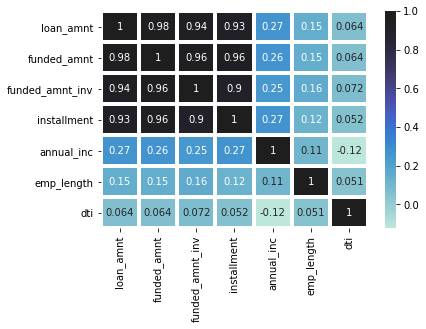

In [24]:
FindCorrelation= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv','installment', 'annual_inc','emp_length', 'loan_status','dti']
corr = loan[FindCorrelation].corr()
sb.heatmap(corr, annot=True, center=1,linewidths=3)

# Crisp
* Loan Amount is much correlated with funded amount,funded amount inv and Installment. The correlation is positive. 
* annual_inc,emp_length and dti decreases as the loan_amount increases. The correlation in negative.

# Lets start with Target Key Column for Analysis- Loan Status
loan_status - Current status of the loan

In [25]:
#Loan Status Count
loan.groupby('loan_status').loan_status.count()

loan_status
Charged Off     5314
Current         1098
Fully Paid     32053
Name: loan_status, dtype: int64

* The ones marked 'current' are neither fully paid not defaulted and the one marked 'fully paid' are completed their loan, tagging the two values as 0 and the one marked as 'Charged-Off' are defaulted  so tagging them as 1 to make analysis more crisp.

In [26]:
# Tagging 0 or 1
loan['loan_status']=np.where((loan['loan_status']=='Charged Off'),1,0)

In [27]:
# Grouping the amount based on Tags 0 or 1 to get the count
loan.groupby('loan_status').loan_status.count()

loan_status
0    33151
1     5314
Name: loan_status, dtype: int64

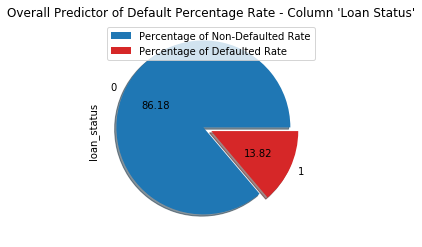

In [28]:
#Graph shows the Overall Defaulted Percentage
explode = (0.1, 0)
#colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
labels = ['Percentage of Non-Defaulted Rate','Percentage of Defaulted Rate']
colors = ["#1f77b4", "#d62728"]
plt.title("Overall Predictor of Default Percentage Rate - Column 'Loan Status'")
loan.loan_status.value_counts(1).plot(kind="pie", fontsize=10,autopct='%.2f',figsize=(4, 4),shadow=True,explode=explode,colors=colors)
plt.legend(labels,loc="best")

## Crisp
* The ones marked 'current' are neither fully paid not defaulted and the one marked 'fully paid' are completed their loan, tagging the two values as 0 and the one marked as 'Charged-Off' are defaulted so tagging them as 1 to make analysis more crisp.
##### As we see in the pie chart the overall precdictors of default rate is approximately 14 Percentage

## Data Analysis : Univariate Analysis
### Categorical Variable
For univariate analysis, Checking the default rate across various Categorical features/Variables
* grade - LC assigned loan grade
* sub_grade - LC assigned loan subgrade
* home_ownership - The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
* term - The number of payments on the loan. Values are in months and can be either 36 or 60.
* verification_status - Indicates if income was verified by LC, not verified, or if the income source was verified


In [29]:
# Taking count of each grade value
loan.groupby('grade').grade.count()

grade
A     9666
B    11655
C     7879
D     5159
E     2773
F     1022
G      311
Name: grade, dtype: int64

In [30]:
# Taking count of each homeownership value
loan.groupby('home_ownership').home_ownership.count()

home_ownership
MORTGAGE    17158
NONE            1
OTHER          96
OWN          2824
RENT        18386
Name: home_ownership, dtype: int64

In [31]:
# Taking count of each term
loan.groupby('term').home_ownership.count()

term
 36 months    28131
 60 months    10334
Name: home_ownership, dtype: int64

In [32]:
# Taking count of each verification status
loan.groupby('verification_status').home_ownership.count()

verification_status
Not Verified       16376
Source Verified     9763
Verified           12326
Name: home_ownership, dtype: int64

Text(0.5, 1.0, 'Defaulted Rates on emp_length')

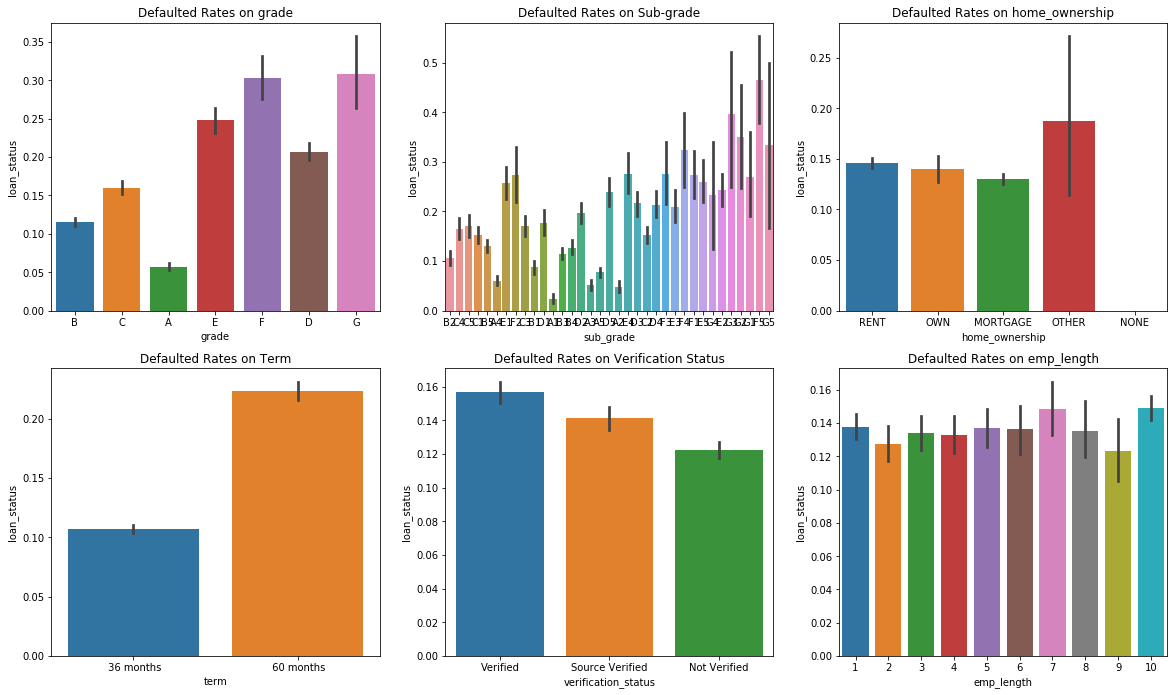

In [33]:
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(331)
sb.barplot(x='grade',y='loan_status',data=loan)
plt.title('Defaulted Rates on grade', fontsize=12)
ax = fig.add_subplot(332)
sb.barplot(x='sub_grade',y='loan_status',data=loan)
plt.title('Defaulted Rates on Sub-grade', fontsize=12)
ax = fig.add_subplot(333)
sb.barplot(x='home_ownership',y='loan_status',data=loan)
plt.title('Defaulted Rates on home_ownership', fontsize=12)
ax = fig.add_subplot(334)
sb.barplot(x='term',y='loan_status',data=loan)
plt.title('Defaulted Rates on Term', fontsize=12)
ax = fig.add_subplot(335)
sb.barplot(x='verification_status',y='loan_status',data=loan)
plt.title('Defaulted Rates on Verification Status', fontsize=12)
ax = fig.add_subplot(336)
sb.barplot(x='emp_length',y='loan_status',data=loan)
plt.title('Defaulted Rates on emp_length', fontsize=12)


## Crisp
* Plot 1(Defaulted Rates on grade) - Most of the loans fall in upper grade 'G' second,third most are in grade 'F' and 'E' and rest all fall in grade 'D','C','B','A'
* Plot 2(Defaulted Rates on Sub-grade) -  Most of the loans fall in upper Sub-grade 'F5'
* Plot 3(Defaulted Rates on home_ownership) - Most of the people have home ownership 'other'
* Plot 4(Defaulted Rates on Term) - Most of the loans happened for 60 months term .Bank for a specific amount that has a specified repayment schedule
* Plot 5(Defaulted Rates on Verification Status) - Majority of the loans defaulted are verified
* Plot 6(Defaulted Rates on Employment length) - Almost similar default happened in Employment length in years. There is no difference. Most of the default happened for the employee having experience of 7, 10years

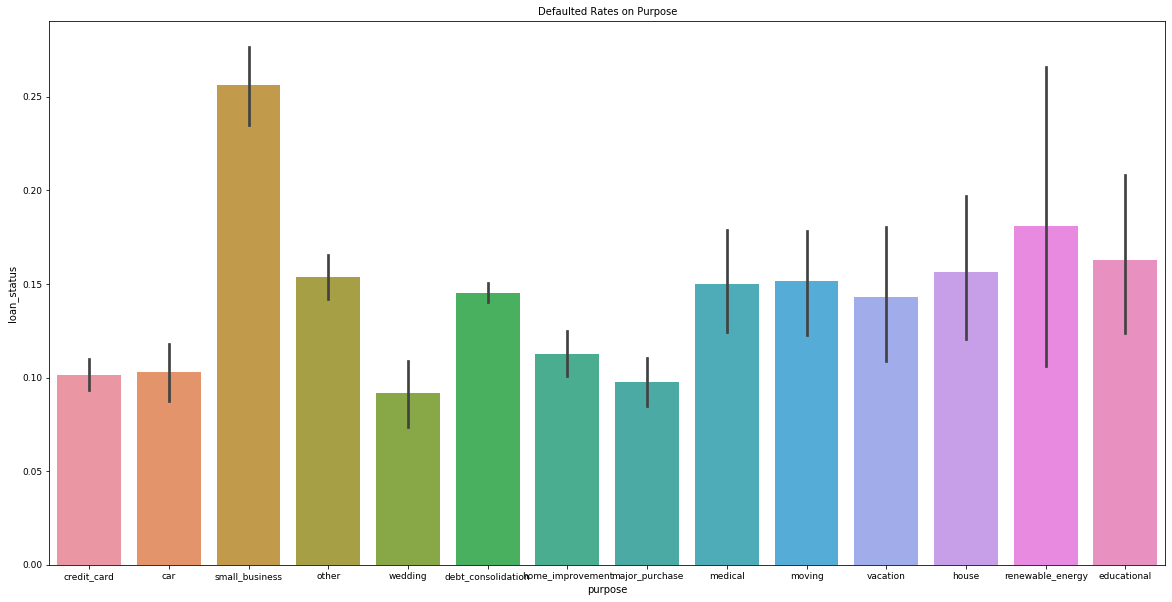

In [34]:
plt.figure(figsize=(20, 10))
plt.rc('xtick', labelsize=9) 
plt.rc('ytick', labelsize=9) 
sb.barplot(x='purpose',y='loan_status',data=loan)
plt.title('Defaulted Rates on Purpose', fontsize=10)
plt.show()

## Crisp
* Most of the loans taken for small business. Borrowing money is expensive for a small company and raises its risk and they are not repaying. Suggesting lending club not to give loan for small business
* Second and third most loans taken for Renewable Energy and Educational

In [35]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,0,credit_card,27.65
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,1,car,1.00
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,0,small_business,8.72
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,0,other,20.00
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,0,other,17.94


## Formating Column - Issue_d - The month which the loan was funded
Formating issue_d column from Month-year to YYYY-MM-DD
Splitting the issue_d YYYY-MM-DD in to two sperate column Issue day and IssueMonth

In [36]:
loan['issue_d']=loan['issue_d'].apply(lambda a: datetime.strptime(a,'%b-%y'))

In [37]:
loan['IssueYear'] = loan['issue_d'].dt.year
loan['IssueMonth'] = loan['issue_d'].dt.month
loan['IssueDay'] = loan['issue_d'].dt.day
loan.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,IssueYear,IssueMonth,IssueDay
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10,RENT,24000.0,Verified,2011-12-01,0,credit_card,27.65,2011,12,1


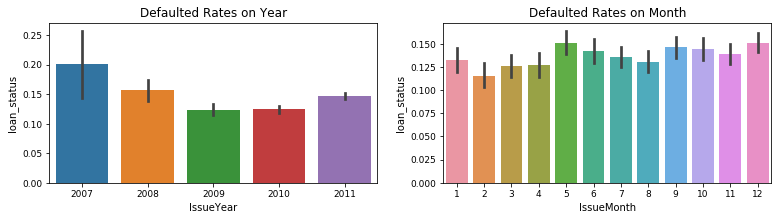

In [38]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(331)
sb.barplot(x='IssueYear',y='loan_status',data=loan)
plt.title('Defaulted Rates on Year', fontsize=12) 
ax = fig.add_subplot(332)
sb.barplot(x='IssueMonth',y='loan_status',data=loan)
plt.title('Defaulted Rates on Month', fontsize=12)
plt.show()

## Crisp
* Most of the loans taken in year 2007 and it got reduced during 2008,2009 and 2010
* Suddenly default rate started increased during 2011
* Most of the loan taken in May and second most december

## Data Analysis : Univariate Analysis 
### Continious Variable
For continuous features, Performing with/without binning and then performing univariate analysis.
* loan_amnt - The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* funded_amnt - The total amount committed to that loan at that point in time.
* funded_amnt_inv - The total amount committed by investors for that loan at that point in time.
* installment - The monthly payment owed by the borrower if the loan originates.
* annual_inc - The self-reported annual income provided by the borrower during registration.
* dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

In [39]:
loan.describe(include=[np.number])

,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,annual_inc,loan_status,dti,IssueYear,IssueMonth,IssueDay
count,38465.000000,38465.000000,38465.000000,38465.000000,38465.000000,3.846500e+04,38465.000000,38465.000000,38465.000000,38465.000000,38465.0
mean,11311.890680,11036.341479,10482.982233,327.271664,5.098401,6.964760e+04,0.138152,13.339236,2010.324373,7.170623,1.0
std,7461.531202,7192.175195,7135.959933,209.128947,3.409044,6.429515e+04,0.345063,6.662900,0.875190,3.401664,0.0
min,500.000000,500.000000,0.000000,15.690000,1.000000,4.000000e+03,0.000000,0.000000,2007.000000,1.000000,1.0
25%,5600.000000,5500.000000,5000.000000,168.740000,2.000000,4.154880e+04,0.000000,8.220000,2010.000000,4.000000,1.0
50%,10000.000000,10000.000000,9000.000000,283.440000,4.000000,6.000000e+04,0.000000,13.420000,2011.000000,7.000000,1.0
75%,15000.000000,15000.000000,14450.000000,435.070000,9.000000,8.320000e+04,0.000000,18.600000,2011.000000,10.000000,1.0
max,35000.000000,35000.000000,35000.000000,1305.190000,10.000000,6.000000e+06,1.000000,29.990000,2011.000000,12.000000,1.0


###### Without binning Distribution and box Sub Plots

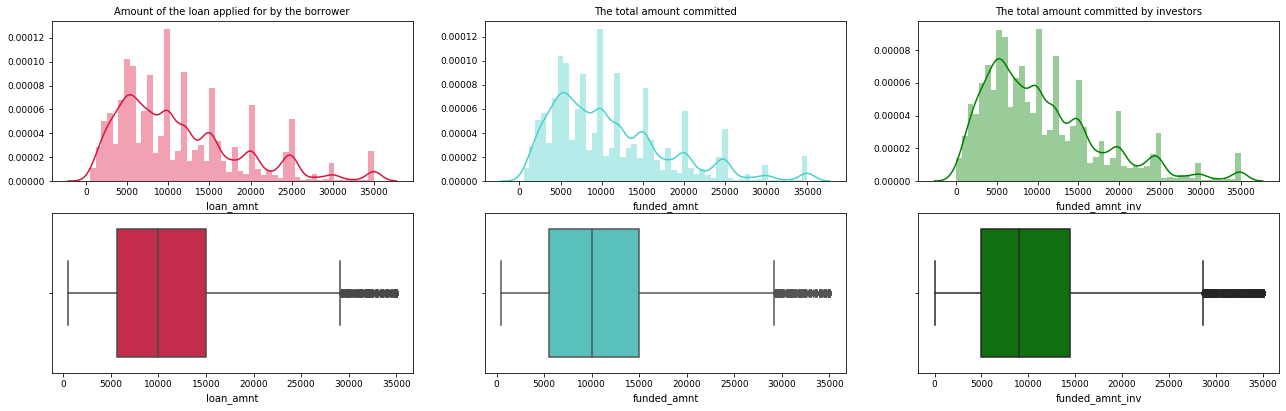

In [40]:
#Without binning Distribution and box Sub Plots for loan_amnt,funded_amnt,funded_amnt_inv
fig = plt.figure(figsize=(22, 10))
ax = fig.add_subplot(331)
sb.distplot(loan['loan_amnt'],color="crimson")
plt.title('Amount of the loan applied for by the borrower', fontsize=10)
ax = fig.add_subplot(332)
sb.distplot(loan['funded_amnt'],color="mediumturquoise")
plt.title('The total amount committed', fontsize=10)
ax = fig.add_subplot(333)
sb.distplot(loan['funded_amnt_inv'],color="green")
plt.title('The total amount committed by investors', fontsize=10)
ax = fig.add_subplot(334)
sb.boxplot(loan['loan_amnt'],color="crimson")
ax = fig.add_subplot(335)
sb.boxplot(loan['funded_amnt'],color="mediumturquoise")
ax = fig.add_subplot(336)
sb.boxplot(loan['funded_amnt_inv'],color="green")
plt.show()

## Crisp
* The amount of the loan applied by the borrower, amount committed to that loan and the loan committed by investors are similarly distributed.
* As shown in plot Maximum amount of loan applied by the borrower were in between 5000 - 15000
* Max amount asked by the borrower were in between 5000 - 15000

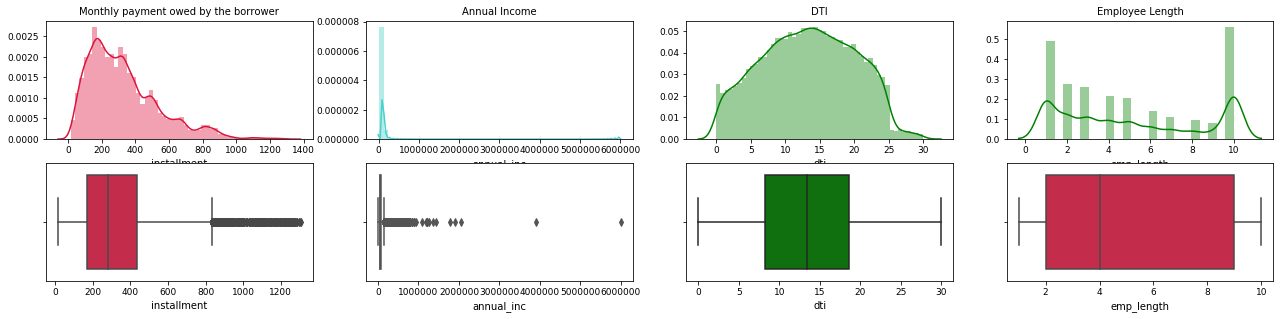

In [41]:
#Without binning Distribution and box Sub Plots for installment,annual_inc,DTI
fig = plt.figure(figsize=(22, 10))
ax = fig.add_subplot(441)
sb.distplot(loan['installment'],color="crimson")
plt.title('Monthly payment owed by the borrower', fontsize=10)
ax = fig.add_subplot(442)
sb.distplot(loan['annual_inc'],color="mediumturquoise")
plt.title('Annual Income', fontsize=10)
ax = fig.add_subplot(443)
sb.distplot(loan['dti'],color="green")
plt.title('DTI', fontsize=10)
ax = fig.add_subplot(444)
sb.distplot(loan['emp_length'],color="green")
plt.title('Employee Length', fontsize=10)
ax = fig.add_subplot(445)
sb.boxplot(loan['installment'],color="crimson")
ax = fig.add_subplot(446)
sb.boxplot(loan['annual_inc'],color="mediumturquoise")
ax = fig.add_subplot(447)
sb.boxplot(loan['dti'],color="green")
ax = fig.add_subplot(448)
sb.boxplot(loan['emp_length'],color="crimson")
plt.show()

## Crisp
* Maximum monthly payment owed by the borrower if the loan originates is lessthan 200 and the median is 280.970000.We are not considering here the Maximum because of outliers as shown in box plots
* The median of self-reported annual income provided by the borrower during registration is 59000. We are not considering here the Maximum because of outliers as shown in box plots

##### Binning
For continuous features, Performing binning to make univariate Analysis

In [42]:
def loan_amount(LoanAmount):
    if LoanAmount < 5000:
        return 'LOW'
    elif LoanAmount >=5000 and LoanAmount < 15000:
        return 'MEDIUM'
    elif LoanAmount >= 15000 and LoanAmount < 25000:
        return 'HIGH'
    else:
        return 'TOOHIGH'
def funded_amnt(FundedAmount):
    if FundedAmount < 5000:
        return 'LOW'
    elif FundedAmount >=5000 and FundedAmount < 15000:
        return 'MEDIUM'
    elif FundedAmount >= 15000 and FundedAmount < 25000:
        return 'HIGH'
    else:
        return 'TOOHIGH'
def funded_amnt_inv(FundedAmountInv):
    if FundedAmountInv < 5000:
        return 'LOW'
    elif FundedAmountInv >=5000 and FundedAmountInv < 15000:
        return 'MEDIUM'
    elif FundedAmountInv >= 15000 and FundedAmountInv < 25000:
        return 'HIGH'
    else:
        return 'TOOHIGH'
def installment(InstallmentAmount):
    if InstallmentAmount < 200:
        return 'LOW'
    elif InstallmentAmount >=200 and InstallmentAmount < 600:
        return 'MEDIUM'
    elif InstallmentAmount >= 600 and InstallmentAmount < 1000:
        return 'HIGH'
    else:
        return 'TOOHIGH'
def annual_inc(AnnualIncome):
    if AnnualIncome < 50000:
        return 'LOW'
    elif AnnualIncome >=50000 and AnnualIncome < 150000:
        return 'MEDIUM'
    elif AnnualIncome >= 150000 and AnnualIncome < 250000:
        return 'HIGH'
    else:
        return 'TOOHIGH'
def dti(DTI):
    if DTI < 5:
        return 'LOW'
    elif DTI >=5 and DTI < 15:
        return 'MEDIUM'
    elif DTI >= 15 and DTI < 25:
        return 'HIGH'
    else:
        return 'TOOHIGH'
def emp_length(n):
    if n <= 1:
        return 'fresher'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'senior'
    else:
        return 'expert'

loan['loan_amnt'] = loan['loan_amnt'].apply(lambda a: loan_amount(a))
loan['funded_amnt'] = loan['funded_amnt'].apply(lambda a: funded_amnt(a))
loan['funded_amnt_inv'] = loan['funded_amnt_inv'].apply(lambda a: funded_amnt_inv(a))
loan['installment'] = loan['installment'].apply(lambda a: installment(a))
loan['annual_inc'] = loan['annual_inc'].apply(lambda a: annual_inc(a))
loan['dti'] = loan['dti'].apply(lambda a: dti(a))
loan['emp_length'] = loan['emp_length'].apply(lambda a: emp_length(a))

Text(0.5, 1.0, 'Defaulted Rates on Binning emp_length')

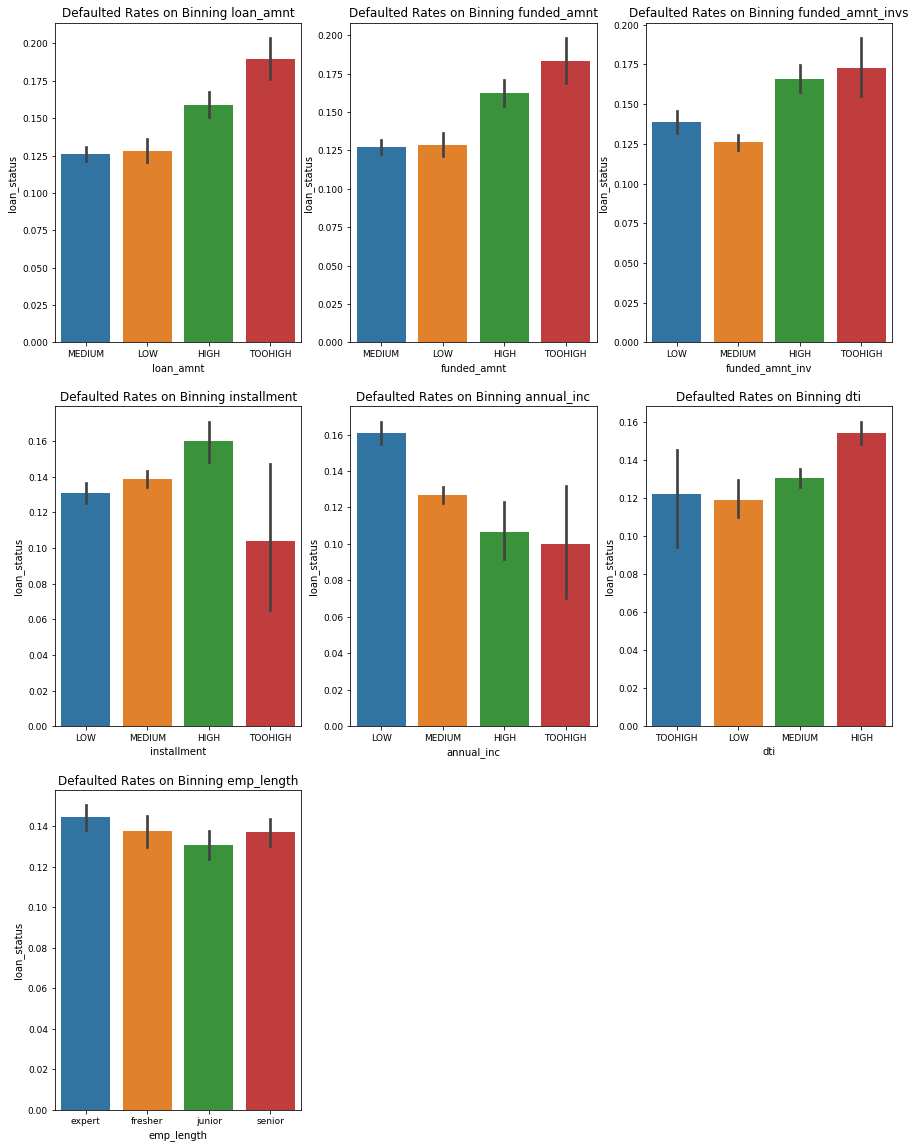

In [43]:
fig = plt.figure(figsize=(15, 20))
ax = fig.add_subplot(331)
sb.barplot(x='loan_amnt',y='loan_status',data=loan)
plt.title('Defaulted Rates on Binning loan_amnt', fontsize=12)
ax = fig.add_subplot(332)
sb.barplot(x='funded_amnt',y='loan_status',data=loan)
plt.title('Defaulted Rates on Binning funded_amnt', fontsize=12)
ax = fig.add_subplot(333)
sb.barplot(x='funded_amnt_inv',y='loan_status',data=loan)
plt.title('Defaulted Rates on Binning funded_amnt_invs', fontsize=12)
ax = fig.add_subplot(334)
sb.barplot(x='installment',y='loan_status',data=loan)
plt.title('Defaulted Rates on Binning installment', fontsize=12)
ax = fig.add_subplot(335)
sb.barplot(x='annual_inc',y='loan_status',data=loan)
plt.title('Defaulted Rates on Binning annual_inc', fontsize=12)
ax = fig.add_subplot(336)
sb.barplot(x='dti',y='loan_status',data=loan)
plt.title('Defaulted Rates on Binning dti', fontsize=12)
ax = fig.add_subplot(337)
sb.barplot(x='emp_length',y='loan_status',data=loan)
plt.title('Defaulted Rates on Binning emp_length', fontsize=12)

## Crisp
* Most of the defaults happened in Too high loan ammout more than 25000 for all the three variables (loan_amnt,funded_amnt,funded_amnt_inv)
* Suggesting lending club to avoid giving money more than 25000
* Borrower whoever getting low income less than 50000 involved in more defaults
* Higher the dti range(15-25) more chances of loan being defaulted
* More Experienced involved in more defaults

## Data Analysis: Bivariate Analysis
* Comparing two variables to understand the purpose of defaults.

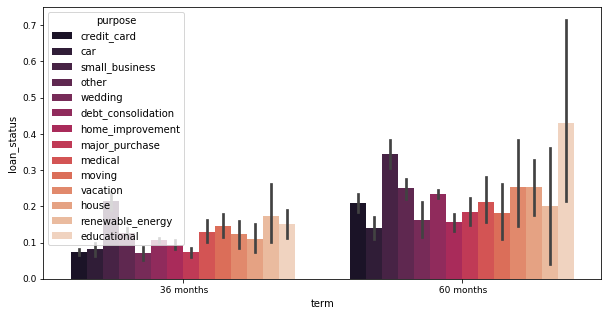

In [44]:
# Comparing Term Vs loan_status across all purpose
plt.figure(figsize=[10, 5])
sb.barplot(x='term',y="loan_status",hue='purpose',data=loan,palette="rocket")
plt.show()

## Crisp
* The number of payments on the loan.Most of the defaults happened in term 60 month for  educational purpose and second most defaults loan for small business
* Seondary In term 36month most of the default happened for Small business purpose
* In both the term commonly the defaults loan happened for small business purpose

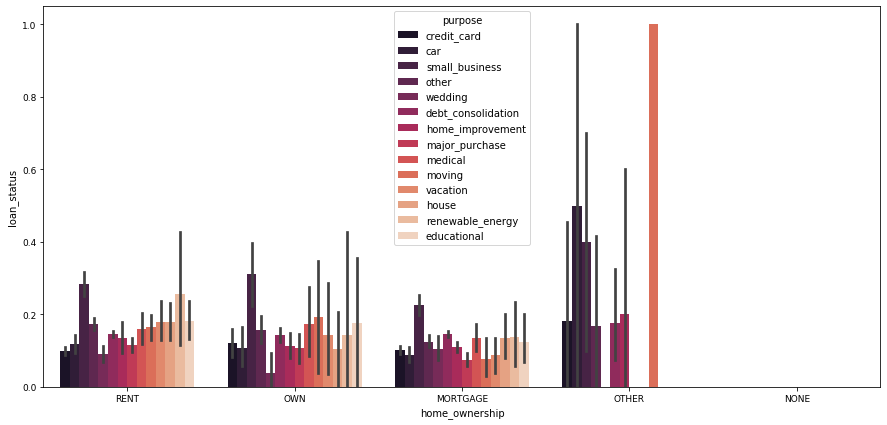

In [45]:
# Comparing home_ownership Vs loan_status across all purpose
plt.figure(figsize=[15, 7])
sb.barplot(x='home_ownership',y="loan_status",hue='purpose',data=loan,palette="rocket")
plt.show()

## Crisp
* Across all the home_ownership the defaults happened for small business and the second and third most are educational and renewable energy

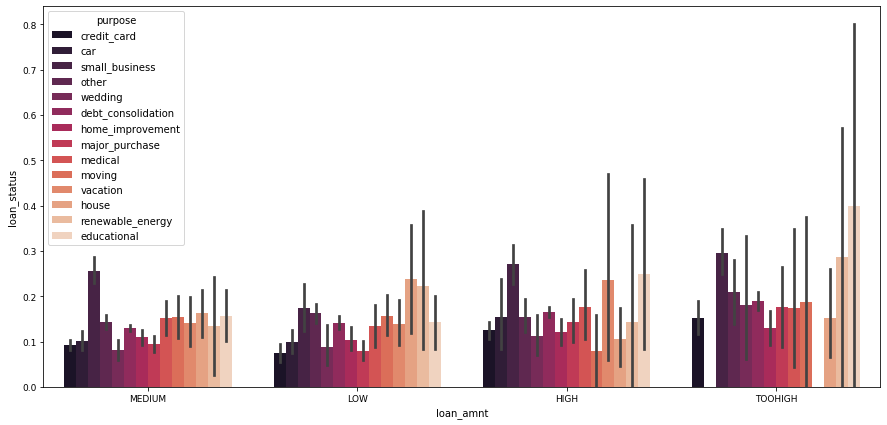

In [46]:
# Comparing loan_amount Vs loan_status across all purpose
plt.figure(figsize=[15,7])
sb.barplot(x='loan_amnt',y="loan_status",hue='purpose',data=loan,palette="rocket")
plt.show()

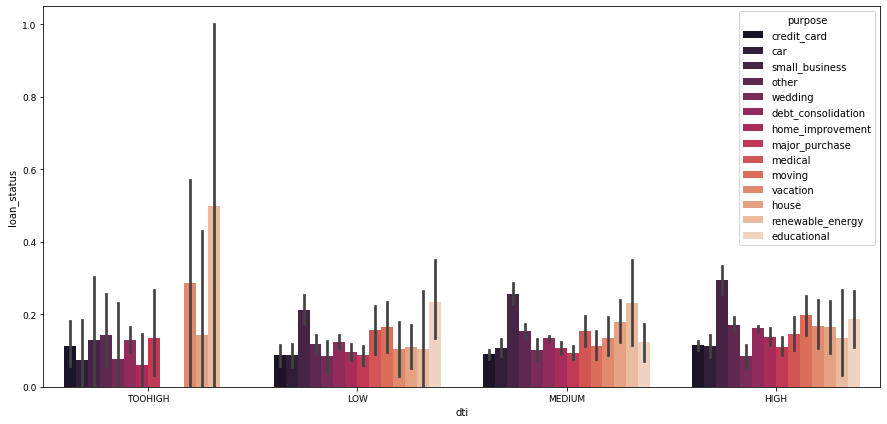

In [47]:
# Comparing home_ownership Vs loan_status across all purpose
plt.figure(figsize=[15,7])
sb.barplot(x='dti',y="loan_status",hue='purpose',data=loan,palette="rocket")
plt.show()

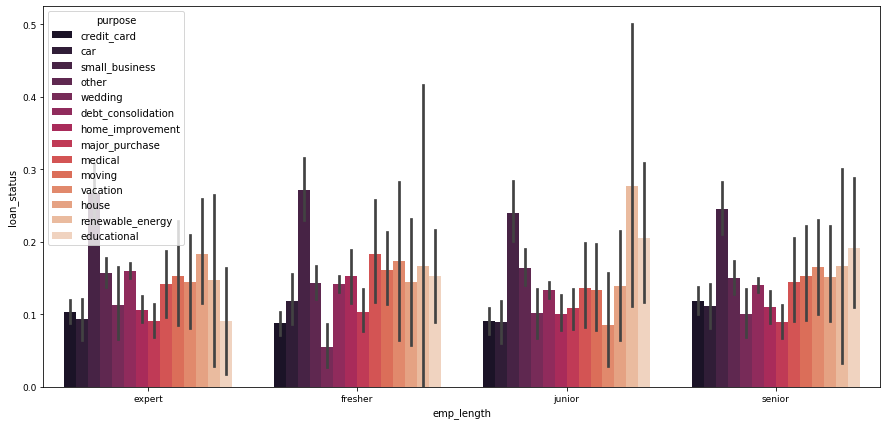

In [48]:
# Comparing home_ownership Vs loan_status across all purpose
plt.figure(figsize=[15,7])
sb.barplot(x='emp_length',y="loan_status",hue='purpose',data=loan,palette="rocket")
plt.show()

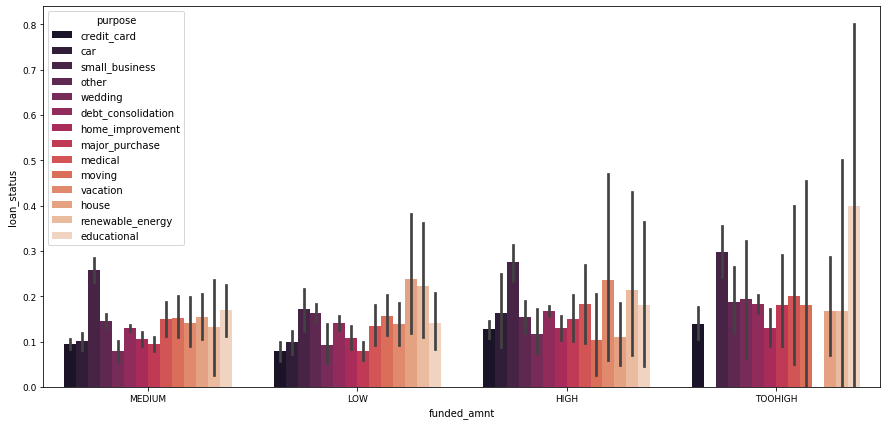

In [49]:
# Comparing funded_amnt Vs loan_status across all purpose
plt.figure(figsize=[15,7])
sb.barplot(x='funded_amnt',y="loan_status",hue='purpose',data=loan,palette="rocket")
plt.show()

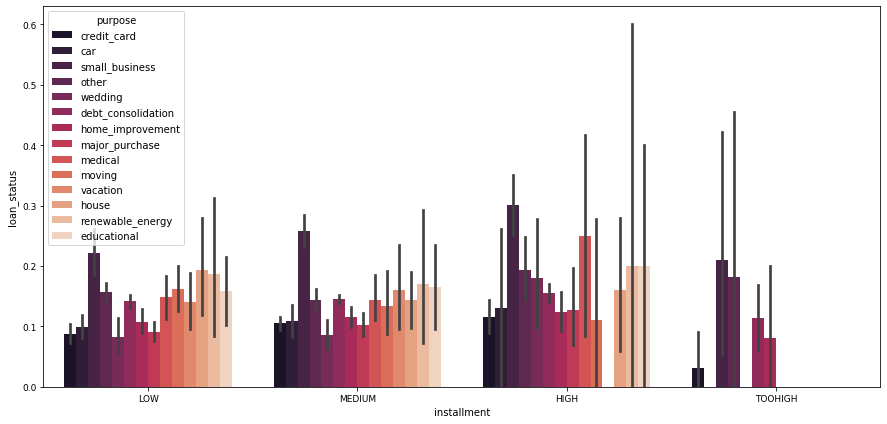

In [50]:
# Comparing installment Vs loan_status across all purpose
plt.figure(figsize=[15,7])
sb.barplot(x='installment',y="loan_status",hue='purpose',data=loan,palette="rocket")
plt.show()

## Crisp
* As seen in the above graph observing the purpose of applying loan is similar across all the variables
* Majorly amount of the loan applied by the borrower for small business and education

## Conclusion
In Lending Club Case Study based on business objective, defined the goals, examine the large amount of data provided, and even plot statistical models in an attempt to explain what is observed during the entire proces.
The overalldefault rate is 14%
### Recommendations to the Investors
#### Below are the suggestion to investors to emphasize on how they can reduce the chances of finding a likely defaulter.
* Suggesting Lending Club to stop approving loans for small business. Borrowing money is expensive for a small company and raises its risk and they are not repaying
* We can reduce the number of loan approvals for Educational and renewable energy
* Stop approving the loans if the annual income is less than 50000 USD
* Reduce or stop approving the loan amount greater than 25000 USD
* Reduce giving loan with people having more employee experience
